In [4]:
import tensorflow as tf
from tensorflow.keras import layers, datasets,models
import numpy as np
import matplotlib.pyplot as plt

#TensorFlow, a popular open-source machine learning framework,
#and its submodule keras, which provides high-level neural networks APIs.

In [5]:
(xtrain,ytrain),(xtest,ytest)=datasets.mnist.load_data()

xtrain will contain the training images.

ytrain will contain the training labels (the correct digit corresponding to each training image).

xtest will contain the testing images.

ytest will contain the testing labels.

In [6]:
xtrain.shape
#(number of samples, height, width)

(60000, 28, 28)

In the MNIST dataset, each image is represented as a 28x28 array of pixel values. The value of each pixel represents the brightness or intensity of that pixel, typically ranging from 0 to 255 in grayscale images, where 0 represents black and 255 represents white.

In [7]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [16]:
#xtrain = tf.keras.utils.normalize(xtrain, axis=1)
classes = {'zero','one','two','three','four','five','six','seven','eight','nine'}

In [17]:
#Normalizing these pixel values typically involves scaling them to a range between 0 and 1. 
xtrain=xtrain/255.0
xtest=xtest/255.0

In [18]:
xtrain

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

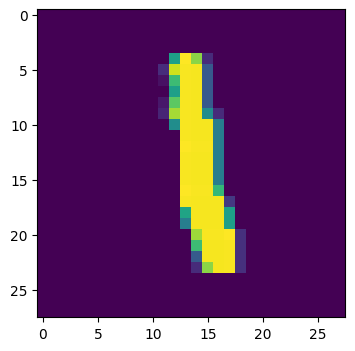

In [30]:
plt.figure(figsize=(4,4))
plt.imshow(xtrain[6])

In [8]:
#This operation is useful in situations where you need to flatten a multi-dimensional array into a one-dimensional array
xtrain.reshape(-1,)


array([0., 0., 0., ..., 0., 0., 0.])

In [9]:
xtest.reshape(-1,)

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
model=models.Sequential([layers.Flatten(input_shape=(28,28)),layers.Dense(100,activation='relu'),layers.Dense(50,activation='relu'),layers.Dense(10,activation='softmax')])

C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Sequential class:- This creates sequential model where each layer added sequentially.
#Flatten layer :- The Flatten layer is used to convert the 2D input data (28x28 image) into a 1D array.
#Dense layer :- Each unit in this layer is connected to every neuron in the previous layer
#Softmax activation function :- Softmax is often used in classification tasks with multiple classes. 
                                # It converts the raw output of the model into probabilities, where each value 
                                 represents the probability of the input belonging to a particular class (in this case, one of the 10 digits from 0 to 9)

In [11]:
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

optimizer='SGD':-
This parameter specifies the optimizer to be used during training. SGD stands for Stochastic Gradient Descent, which is a popular optimization algorithm used to update the parameters (weights) of the neural network in order to minimize the loss function. In this case, SGD is used with its default parameters.

sparse_categorical_crossentropy:-
It computes the cross-entropy loss between the true labels and the predicted probability distribution.

'accuracy':-
is a common metric used in classification problems. It measures the proportion of correctly classified samples out of the total number of samples.

In [12]:
model.fit(xtrain,ytrain)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6724 - loss: 1.1515


In [13]:
model.fit(xtrain,ytrain,epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9028 - loss: 0.3306
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9244 - loss: 0.2632


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)
print("Classification Report:\n", classification_report(ytest, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.93      0.93      1032
           3       0.90      0.94      0.92      1010
           4       0.94      0.92      0.93       982
           5       0.96      0.87      0.91       892
           6       0.93      0.95      0.94       958
           7       0.95      0.93      0.94      1028
           8       0.92      0.90      0.91       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



The argmax() function is used to find the index (class) with the maximum probability along the specified axis (axis=1 indicates along the columns).